In [ ]:
import FinanceDataReader as web ##웹상에서 내가 원하는 정보를 가지고 올 수 있음
from datetime import date, timedelta
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

## font설정 : 깨지지 않게 하기 위해서
plt.figure(figsize=(15,9))
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [ ]:
today = date.today()
startday = date.today() - timedelta(720) ##현재 날짜에서 720일 과거로 돌아가서 추적을 하겠다
yesterday = date.today() - timedelta(1)
#startday = '3/14/2014'
#yesterday = '4/14/2016'
print(yesterday)

In [7]:
SEC = web.DataReader("207940", startday, yesterday) ##DataReader를 통하면 내가 원하는 데이터롤 바로 가지고 올 수 있음
SEC.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-07-03,291000,291500,276000,280500,511043,-0.039384
2017-07-04,282000,291000,278000,289000,416925,0.030303
2017-07-05,291500,292000,285000,289000,177422,0.000000
2017-07-06,290000,297500,288500,289500,273210,0.001730
2017-07-07,288500,294500,285500,290500,175545,0.003454


              Open    High     Low   Close  Volume    Change
Date                                                        
2019-06-14  316500  316500  312000  313000   67881 -0.011058
2019-06-17  311500  314000  308000  309000   36986 -0.012780
2019-06-18  309500  316000  309500  314000   68834  0.016181
2019-06-19  316000  318000  313000  315000   51459  0.003185
2019-06-20  315500  317500  315000  317000   46507  0.006349


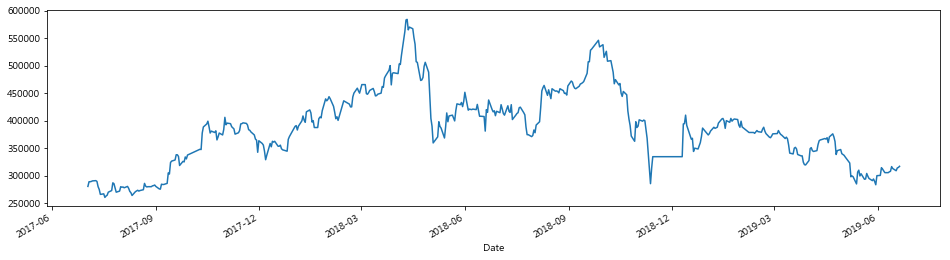

In [8]:
#SEC = web.get_data_yahoo("005930.KS", startday, yesterday)
print(SEC.tail())
SEC['Close'].plot(figsize=(16,4)) #차트의 사이즈 옵션
plt.show()

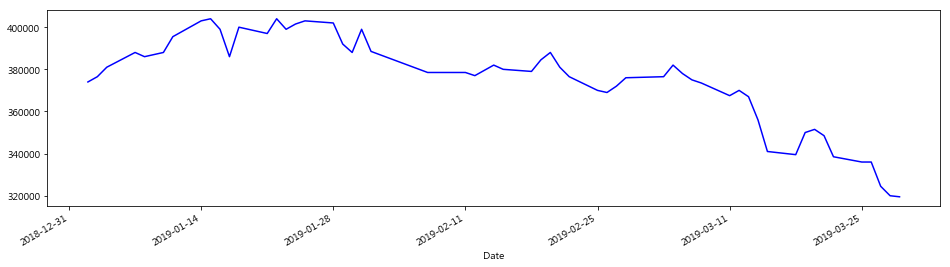

In [10]:
SEC['2019-01-01':'2019-03-31']['Close'].plot(figsize=(16,4), style='b')
plt.show()

In [21]:
%matplotlib inline
plt.figure(figsize=(15,9))
today = date.today()
startday = date(2018,4,1)
endday = date(2018,6,27)
SEC = web.DataReader("207940", startday, endday)
SEC = SEC[SEC['Volume'] != 0]
SEC.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-04-02,487000,490000,482500,486000,91013,-0.002053
2018-04-03,484000,489500,480000,485500,127515,-0.001029
2018-04-04,490000,505000,486000,503000,305367,0.036045
2018-04-05,501000,505000,496500,502000,193001,-0.001988
2018-04-06,509000,534000,508000,519000,294164,0.033865


In [24]:
## [] 안에 []를 하나 더 씀으로써 'Close'라는 컬럼을 하나 더만들었음
## shift(1)을 통해 1개를 앞으로 밀었음
SEC[['Close']].shift(1).head() 

,Close
Date,
2018-04-02,NaN
2018-04-03,486000.0
2018-04-04,485500.0
2018-04-05,503000.0
2018-04-06,502000.0


In [26]:
## 수익률 계산
SEC['Close_S'] = SEC['Close'].shift(1)

In [27]:
import numpy as np

In [30]:
## 로그 수익률 : ln 미래가격/이전가격 =>최종 수익률과 수익률 합이 일치(금융분야에서 주로 사용)
SEC["Rate"] = np.log(SEC.Close_S) - np.log(SEC.Close)

In [31]:
SEC

,Open,High,Low,Close,Volume,Change,Close_S,Rate
Date,,,,,,,,
2018-04-02,487000,490000,482500,486000,91013,-0.002053,NaN,NaN
2018-04-03,484000,489500,480000,485500,127515,-0.001029,486000.0,0.001029
2018-04-04,490000,505000,486000,503000,305367,0.036045,485500.0,-0.035411
2018-04-05,501000,505000,496500,502000,193001,-0.001988,503000.0,0.001990
2018-04-06,509000,534000,508000,519000,294164,0.033865,502000.0,-0.033304
2018-04-09,528000,580000,524000,562000,543779,0.082852,519000.0,-0.079598
2018-04-10,576000,600000,563000,583000,665027,0.037367,562000.0,-0.036685
2018-04-11,587000,591000,565000,584000,335242,0.001715,583000.0,-0.001714
2018-04-12,577000,586000,565000,565000,273812,-0.032534,584000.0,0.033075


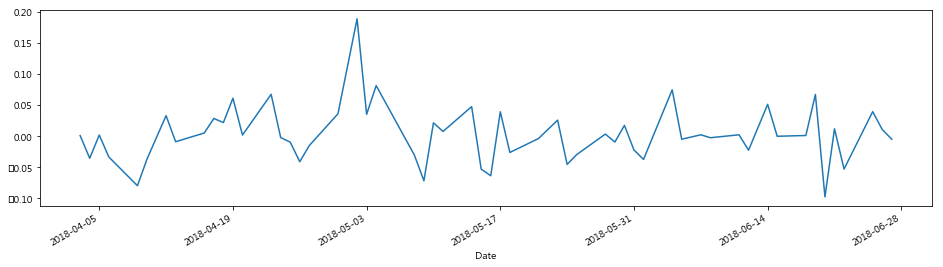

In [34]:
SEC['Rate'].plot(figsize=(16,4))

# 실습1. 원하는 종목코드 가져오기

## step1. 라이브러리 정의

In [35]:
#step1. 라이브러리 정의
import urllib.parse
import pandas as pd

## step2. 마켓 타입 및 ULR정의

In [36]:
# step2. 마켓타입 및 URL 정의
MARKET_CODE_DICT = {
    'kospi': 'stockMkt',
    'kosdaq': 'kosdaqMkt',
    'konex': 'konexMkt'
}

DOWNLOAD_URL = 'https://kind.krx.co.kr/corpgeneral/corpList.do'

## step3. 함수정의 #1.[종목코드 6자리]

In [38]:
# 왼쪽에다가 6개의 0을 채워주는 키워드 : zfilll(6) (LAPD와 비슷) , 하는 이유 : 회사 종목 코드가 6자리가 아닌경우가 있어서
def zeroFill(columnValue):
    columnValue = str(columnValue)
    outValue = columnValue.zfill(6) 
    return outValue

## step3. 함수정의 #2.[파일 다운로드]

In [39]:
def get_stock_codes(market=None, delisted=False): #market이라는 첫번째 파라메터에다가 코스닥을 던지던지 코스피를 던지던지 할거야
    params = {'method': 'download'} ##메소드는 다운로드 => 딕셔너리로 선언

    if market.lower() in MARKET_CODE_DICT:
        ## marketType 키 추가
        params['marketType'] = MARKET_CODE_DICT[market] #params에 marketType이라는 키 를 하나 더 생성(MARKET_CODE_DICT에 있는 market딕셔너리로)
        print(market.lower()+" market key is exist")
    else:
        #params['searchType'] = 13
        print("invalid market")

    # make url  key=value & key = value
    params_string = urllib.parse.urlencode(params) ## url에 파라메터 방식으로 encoding을 시켜줌
    request_url = DOWNLOAD_URL+"?"+params_string ## 원래 있던 기본적인 url에다가 파라메터를 넣어서 최종적인 full url을 완성시킴

    df = pd.read_html(request_url, header=0)[0]
    df["종목코드"] = df.종목코드.apply(zeroFill) 

    return df

## step4. 종목 코드 가져오기

In [40]:
stocks = get_stock_codes('kospi')
stocks.head(2)

kospi market key is exist


,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,JS전선,005560,절연선 및 케이블 제조업,"선박선,고무선,전력선,통신선 제조",2007-11-12,12월,이익희,http://www.jscable.co.kr,충청남도
1,거북선2호,101380,NaN,운송장비(선박) 임대,2008-04-25,12월,신주선,NaN,부산광역시


In [41]:
mystock = input("Enter a stock_name : ")

Enter a stock_name : CJ제일제당


In [46]:
stock_codeDF = stocks[ (stocks.회사명 == mystock)][['회사명', '종목코드']]

In [47]:
stock_codeDF

,회사명,종목코드
799,CJ제일제당,097950


# 실습2. 매도/매수 결정

## step1. 관심종목 변수 정의

In [48]:
stock_code = stock_codeDF.iloc[0]['종목코드']
stock_name = stock_codeDF.iloc[0]['회사명']
print(stock_name)
print(stock_code)

CJ제일제당
097950


## step2. 라이브러리 정의

In [49]:
import FinanceDataReader as web
from datetime import date, timedelta
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

## step2. 폰트 세팅

In [50]:
#font setting for window
#font setting for mac (AppleGothic)
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9) 

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['rc']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## step3. 단기, 장기 이동평균 및 차이 산출

In [57]:
SEC['MA_5']=SEC['Close'].rolling(window=5).mean() ##단기 평균
SEC['MA_20']=SEC['Close'].rolling(window=20).mean() ##장기 평균
SEC['diff']=SEC['MA_5']-SEC['MA_20'] ##단기평균-장기평균을 diff라는 컬럼에 집어넣을거야
SEC.tail(5)

,Open,High,Low,Close,Volume,Change,Close_S,Rate,MA_5,MA-20,diff,MA_20
Date,,,,,,,,,,,,
2018-06-21,420000,426000,411000,415000,153582,-0.011905,420000.0,0.011976,406300.0,419600.0,-13300.0,419600.0
2018-06-22,419500,445500,415500,437500,345522,0.054217,415000.0,-0.052798,412200.0,421500.0,-9300.0,421500.0
2018-06-25,438000,438500,418000,420500,165310,-0.038857,437500.0,0.039632,414800.0,421625.0,-6825.0,421625.0
2018-06-26,410000,419000,400500,416000,217564,-0.010702,420500.0,0.010759,421800.0,420900.0,900.0,420900.0
2018-06-27,414500,426500,413000,418000,116211,0.004808,416000.0,-0.004796,421400.0,420350.0,1050.0,420350.0


## step4. 시각화 분석

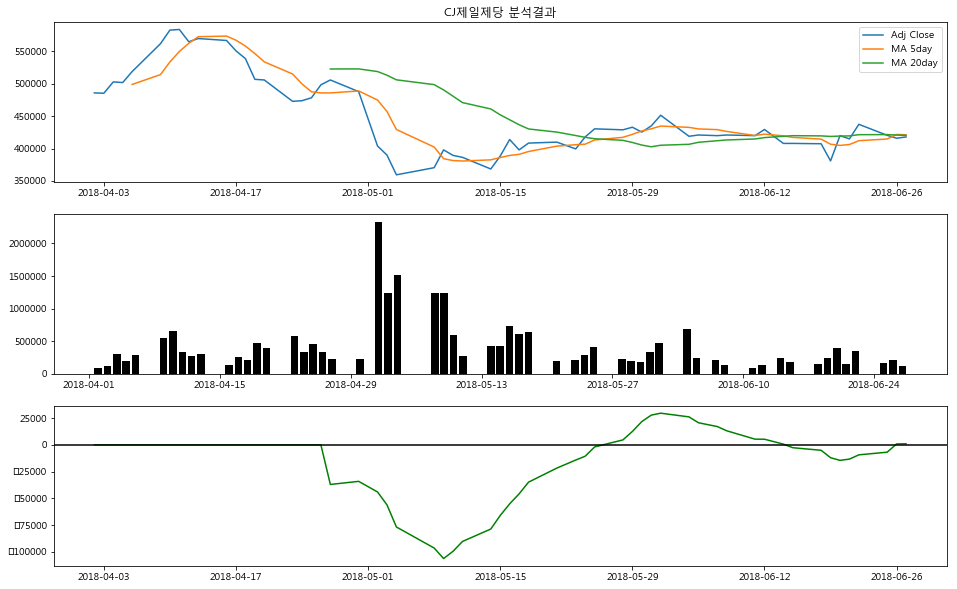

In [60]:
plt.figure(figsize = (16,10))

#price (가격)
plt.subplot(311)
plt.plot(SEC.index, SEC['Close'], label = 'Adj Close') ##종가
plt.plot(SEC.index, SEC['MA_5'], label='MA 5day') 
plt.plot(SEC.index, SEC['MA_20'], label='MA 20day') ##이동평균
plt.title(u'삼성바이오로직스 2018')
plt.title(stock_name+" 분석결과")
plt.legend(loc='best')

# volume (거래량)
plt.subplot(312) ##3행 1열로 나열된 그래프중 2번째 자리라는 뜻이야
plt.bar(SEC.index, SEC['Volume'], color='black')

#  이동평균 차이 (diff)
##그래프가 0을 기준으로 –이면 팔아야한다, 0이상이면 계속 둬도 된다는 시그널을 사람에게 줄 수 있음
diffChart = plt.subplot(313)
diffChart.plot(SEC.index, SEC['diff'].fillna(0), color='g')
plt.axhline(y=0, color='k')